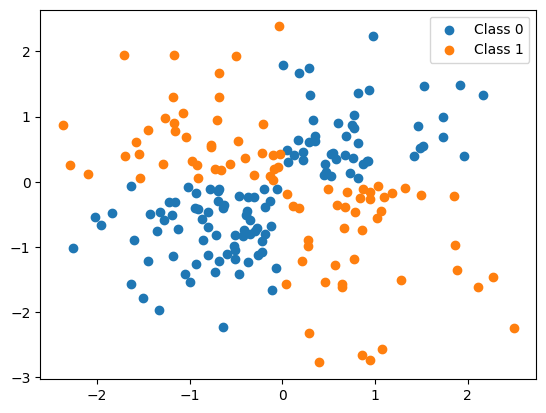

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


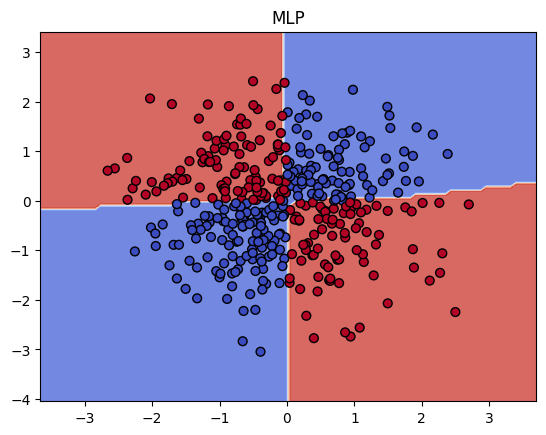

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


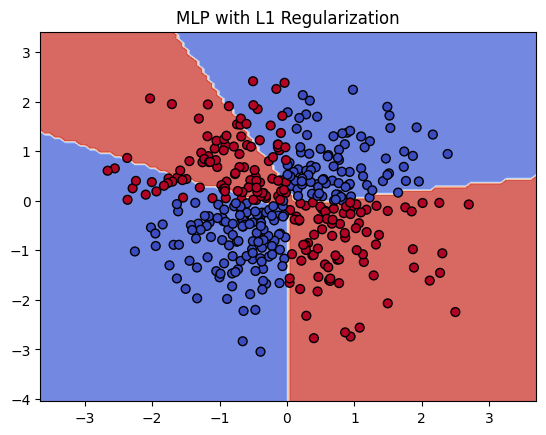

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


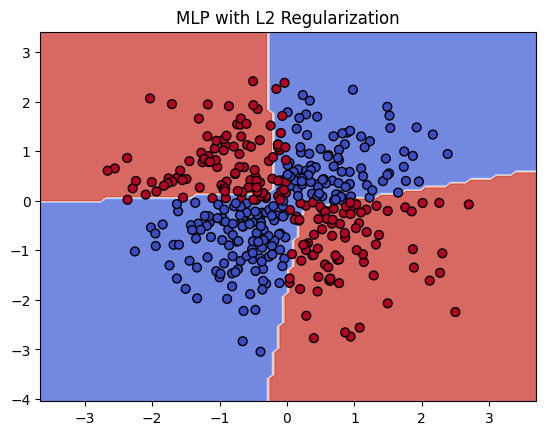

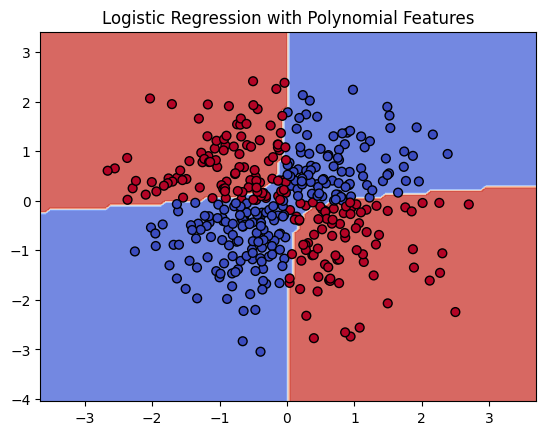

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP Accuracy: 0.955
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MLP with L1 Regularization Accuracy: 0.795
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MLP with L2 Regularization Accuracy: 0.86
Logistic Regression with Polynomial Features Accuracy: 0.89


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2
import tensorflow as tf

# 1. Generate XOR dataset
np.random.seed(0)
X = np.random.randn(400, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Visualize the dataset
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label="Class 0")
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label="Class 1")
plt.legend()
plt.show()

# Utility function to plot decision surface
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Generate predictions for the grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()


# 2a. Train a simple MLP
mlp = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp.fit(X_train, y_train, epochs=100, verbose=0)
plot_decision_boundary(lambda x: (mlp.predict(x) > 0.5).astype(int), X, y, "MLP")

# 2b. MLP with L1 regularization
mlp_l1 = Sequential([
    Dense(8, input_dim=2, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l1(0.01)),
    Dense(1, activation='sigmoid')
])
mlp_l1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_l1.fit(X_train, y_train, epochs=100, verbose=0)
plot_decision_boundary(lambda x: (mlp_l1.predict(x) > 0.5).astype(int), X, y, "MLP with L1 Regularization")

# 2c. MLP with L2 regularization
mlp_l2 = Sequential([
    Dense(8, input_dim=2, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])
mlp_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_l2.fit(X_train, y_train, epochs=100, verbose=0)
plot_decision_boundary(lambda x: (mlp_l2.predict(x) > 0.5).astype(int), X, y, "MLP with L2 Regularization")

# 2d. Logistic Regression with polynomial features
X_poly = np.c_[X, X[:, 0] * X[:, 1], X[:, 0]**2, X[:, 1]**2]
X_train_poly, X_test_poly, _, _ = train_test_split(X_poly, y, test_size=0.5, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)
plot_decision_boundary(lambda x: log_reg.predict(np.c_[x, x[:, 0] * x[:, 1], x[:, 0]**2, x[:, 1]**2]), X, y, "Logistic Regression with Polynomial Features")

# Evaluate and print accuracy for each model
print("MLP Accuracy:", accuracy_score(y_test, (mlp.predict(X_test) > 0.5).astype(int)))
print("MLP with L1 Regularization Accuracy:", accuracy_score(y_test, (mlp_l1.predict(X_test) > 0.5).astype(int)))
print("MLP with L2 Regularization Accuracy:", accuracy_score(y_test, (mlp_l2.predict(X_test) > 0.5).astype(int)))
print("Logistic Regression with Polynomial Features Accuracy:", accuracy_score(y_test, log_reg.predict(X_test_poly)))
